# Wrangle and Analyze Data

## Introduction

This project focused on wrangling data from the WeRateDogs Twitter account using Python, documented in a Jupyter Notebook (wrangle_act.ipynb). This Twitter account rates dogs with humorous commentary. The rating denominator is usually 10, however, the numerators are usually greater than 10. They’re Good Dogs Brent wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for us to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017.

The goal of this project is to wrangle the WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The challenge lies in the fact that the Twitter archive is great, but it only contains very basic tweet information that comes in JSON format. I needed to gather, asses and clean the Twitter data for a worthy analysis and visualization.

### The Data
**Enhanced Twitter Archive**

The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced.".We manually downloaded this file manually by clicking the following link: twitter_archive_enhanced.csv

**Image Predictions File**

he tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) hosted on Udacity's servers and we downloaded it programmatically using python Requests library on the following (URL of the file: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv)

**Twitter API**

Back to the basic-ness of Twitter archives: retweet count and favorite count are two of the notable column omissions. Fortunately, this additional data can be gathered by anyone from Twitter's API. Well, "anyone" who has access to data for the 3000 most recent tweets, at least. But we, because we have the WeRateDogs Twitter archive and specifically the tweet IDs within it, can gather this data for all 5000+. And guess what? We're going to query Twitter's API to gather this valuable data.


### Key Points

Before we start, herea are few points to keep in mind when data wrangling for this project:

- We only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.

- Fully assessing and cleaning the entire dataset requires exceptional effort so only a subset of its issues (eight (8) quality issues and two (2) tidiness issues at minimum) need to be assessed and cleaned.

- Cleaning includes merging individual pieces of data according to the rules of tidy data.

- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tweepy
import json
from timeit import default_timer as timer

## Gathering Data


**loading the twitter-archive-enhanced.csv into a DataFrame [WeRateDogs Twitter archive]**

In [2]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

**Loading the tweet image predictions from Udacity's servers**

In [3]:
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

with open('image-predictions.tsv', mode='wb') as file:
    file.write(r.content)

Here I tried printing r.content and it looks like `b"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf`
So, while reading this as CSV, we need to use \t sep

In [4]:
image_pred_df = pd.read_csv('image-predictions.tsv', sep='\t')

**Loading Favorite count and retweet count from Twitter**

In [256]:
consumer_key ='xxxx'
consumer_secret ='xxxx'
access_token ='xxxx'
access_secret = 'xxxx'

In [6]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
start = timer()
df_list = []
errors = []
for id in archive_df['tweet_id']:
    try:
        tweet = api.get_status(id, tweet_mode='extended')
        df_list.append({'tweet_id': str(tweet.id),
                        'favorite_count': int(tweet.favorite_count),
                        'retweet_count': int(tweet.retweet_count)})
    except Exception as e:
        print(str(id) + " : " + str(e))
        errors.append(id)
end = timer()

888202515573088257 : [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 : [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 : [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 : [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 : [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 : [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 : [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 : [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 : [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 : [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 : [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 : [{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778 : [{'code

In [175]:
print("Total query time:",end - start, "secs")

Total query time: 1910.5672976619999 secs


In [176]:
#saving the df_list to JSON file
with open('tweet_json.txt', 'w') as outfile:  
    json.dump(df_list, outfile)
    
# loading the JSON file as a dataframe
with open('tweet_json.txt', 'r') as file:
    tweet_counts_df = pd.DataFrame(json.load(file), columns=['tweet_id', 'favorite_count', 'retweet_count'])

## Assessing Data


### Access archive_df

In [177]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [178]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

**1. Missing data in the following columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, etweeted_status_user_id, retweeted_status_timestamp, expanded_urls**

**2. Timestamp and retweeted_status_timestamp is an object**

**3. Source columns have HTML tags**

**4. This dataset includes retweets, which means there is duplicated data**


In [179]:
# checks for duplicated entries in archive_df
archive_df[archive_df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


**No Duplicates entry present**

In [180]:
archive_df.skew()

tweet_id                     0.565127
in_reply_to_status_id        0.502124
in_reply_to_user_id          6.168833
retweeted_status_id         -0.192622
retweeted_status_user_id     7.656559
rating_numerator            29.770427
rating_denominator          17.152358
dtype: float64

**The rating_numerator and rating_denominator is highly positive skewed**

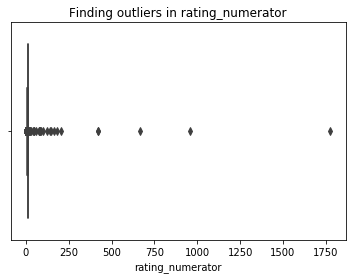

In [181]:
ax = sns.boxplot(x=archive_df["rating_numerator"]).set_title('Finding outliers in rating_numerator')

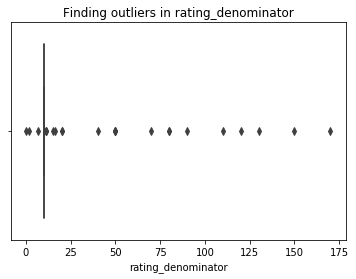

In [182]:
ax = sns.boxplot(x=archive_df["rating_denominator"]).set_title('Finding outliers in rating_denominator')

In [183]:
archive_df["rating_numerator"].max()

1776

In [184]:
archive_df["rating_denominator"].max()

170

**rating_numerator contains max value 1776 and rating_denominator contains max value of 170**

In [185]:
archive_df[archive_df.name.str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
quite            4
just             4
one              4
mad              2
actually         2
getting          2
not              2
officially       1
life             1
all              1
by               1
unacceptable     1
infuriating      1
my               1
such             1
his              1
old              1
light            1
this             1
incredibly       1
space            1
Name: name, dtype: int64

**Dogs name have 'None', or 'a', or 'an.' and some more lower case words as names**

In [186]:
archive_df.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1976
1,None,None,None,puppo,29
2,None,None,pupper,None,245
3,None,floofer,None,None,9
4,doggo,None,None,None,83
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,12
7,doggo,floofer,None,None,1


**Multiple dog stages occurs such as 'doggo puppo', 'doggo pupper', 'doggo floofer'**

### Access image_pred_df

In [187]:
image_pred_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True



**dog breeds are not consistently in p1,p2,p3 columns i.e lower or uppercase**

In [188]:
image_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**Contains non null values**

In [189]:
# checks for duplicated entries in image_pred_df
image_pred_df[image_pred_df.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


**No Duplicate tweet_id present.** 

**Lets check duplicate entries for jpg_url:**

In [190]:
# checks for duplicated entries in jpg_url
image_pred_df[image_pred_df.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [191]:
# Count of duplicate jpg_url
image_pred_df[image_pred_df.jpg_url.duplicated()].shape[0]

66

**jpg_url contains duplicate items means duplicate image links**

In [192]:
image_pred_df.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

### Access tweet_counts_df

In [193]:
tweet_counts_df.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,36324,7728
1,892177421306343426,31306,5721
2,891815181378084864,23585,3786
3,891689557279858688,39633,7892
4,891327558926688256,37834,8512


In [194]:
tweet_counts_df.sample(20)

,tweet_id,favorite_count,retweet_count
752,776813020089548800,4958,1234
1082,734787690684657664,12520,6265
1323,704364645503647744,7998,3546
713,781655249211752448,4075,1146
1934,673576835670777856,1347,545
1199,714251586676113411,3270,830
1439,694669722378485760,35793,14380
1892,674291837063053312,14320,5670
2246,667495797102141441,503,254
1011,744995568523612160,2973,623


In [195]:
tweet_counts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null object
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


**tweet_id is an object**

In [196]:
tweet_counts_df.describe()

,favorite_count,retweet_count
count,2331.000000,2331.000000
mean,7587.457743,2713.799657
std,11773.904822,4589.785424
min,0.000000,1.000000
25%,1324.000000,548.500000
50%,3303.000000,1274.000000
75%,9296.500000,3152.000000
max,156794.000000,78127.000000


In [197]:
# checks for duplicated entries in tweet_counts_df
tweet_counts_df[tweet_counts_df.tweet_id.duplicated()]

,tweet_id,favorite_count,retweet_count


**No Duplicate entries present**

### Quality Issues

**archive_df:**
- Missing data in the following columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls [Solved]
- This dataset includes retweets, which means there is duplicated data [Solved]
- Timestamp and retweeted_status_timestamp is an object [Solved]
- The source column still has the HTML tags [Solved]
- Dogs name have 'None', or 'a', or 'an.' and some more lower case words as names [Solved]
- The rating_numerator and rating_denominator is highly positive skewed [Solved]
- Multiple dog stages occurs such as 'doggo puppo', 'doggo pupper', 'doggo floofer' [Solved]

**image_pred_df**:

- dog breeds are not consistently in p1,p2,p3 columns [Solved]

**tweet_counts_df:**
- Missing data [Solved]
- tweet_id is an object [Solved]


### Tidiness Issues

**archive_df:**
- The variable for the dog's stage (dogoo, floofer, pupper, puppo) is spread in different columns [Solved]

**image_pred_df**:

- This data set is part of the same observational unit as the data in the archive_df [Solved]

**tweet_counts_df:**

- This data set is also part of the same observational unit as the data in the archive_df [Solved]


## Cleaning Data


**Making a copy of the dataframes before cleaning**

In [198]:
archive_clean = archive_df.copy()
image_pred_clean = image_pred_df.copy()
tweet_counts_clean = tweet_counts_df.copy()

**DEFINE-CODE-TEST**

1. Creates a predicted dog breed column, based on the the confidence level of minimum 20% and 'p1_dog', 'p2_dog' and 'p3_dog' statements
2. Create one column for the various dog types: doggo, floofer, pupper, puppo, 'doggo, puppo', 'doggo, pupper', 'doggo, floofer'
3. Convert the tweet_id in tweet_counts_clean into int64 type for merging.
4. Merge the copied archive_clean, image_pred_clean, and tweet_counts_clean dataframes
5. Convert the tweet_id in master_df into object type
6. Replace 'a', 'an', 'the', 'None' and other lower case words with NaN in name column
7. Remove Inconsistency in pred_breed
8. Delete retweets
9. Remove columns no longer needed: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp
10. Change the timestamp to correct datetime format
11. Removing HTML tags from source column
12. Standardize dog ratings


**DEFINE**

**1. Creates a predicted dog breed column, based on the the confidence level of minimum 20% and 'p1_dog', 'p2_dog' and 'p3_dog' statements**

**CODE**

In [199]:
image_pred_clean.sample(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1622,803380650405482500,https://pbs.twimg.com/media/CyYub2kWEAEYdaq.jpg,1,bookcase,0.890601,False,entertainment_center,0.019287,False,file,0.00949,False


In [200]:
image_pred_clean['pred_breed'] = [df['p1'] if df['p1_dog'] == True and df['p1_conf'] > 0.2 
                     else df['p2'] if df['p2_dog'] == True and df['p2_conf'] > 0.2
                     else df['p3'] if df['p3_dog'] == True and df['p3_conf'] > 0.2
                     else np.nan for index, df in image_pred_clean.iterrows()]

In [201]:
## Drop 'p1', 'p1_dog', 'p1_conf','p2', 'p2_dog', 'p2_conf','p3', 'p3_dog', 'p3_conf' columns
image_pred_clean.drop(['p1', 'p1_dog', 'p1_conf','p2', 'p2_dog', 'p2_conf','p3', 'p3_dog', 'p3_conf'], axis = 1, inplace=True)

**TEST**

In [202]:
image_pred_clean.head(3)

,tweet_id,jpg_url,img_num,pred_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd


**DEFINE**


**2. Create one column for the various dog types: doggo, floofer, pupper, puppo, 'doggo, puppo', 'doggo, pupper', 'doggo, floofer'**

**CODE**

In [203]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [204]:
archive_clean.doggo.replace(np.NaN, '', inplace=True)
archive_clean.floofer.replace(np.NaN, '', inplace=True)
archive_clean.pupper.replace(np.NaN, '', inplace=True)
archive_clean.puppo.replace(np.NaN, '', inplace=True)
archive_clean.doggo.replace('None', '', inplace=True)
archive_clean.floofer.replace('None', '', inplace=True)
archive_clean.pupper.replace('None', '', inplace=True)
archive_clean.puppo.replace('None', '', inplace=True)

In [205]:
archive_clean['stage'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo
archive_clean.loc[archive_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
archive_clean.loc[archive_clean.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
archive_clean.loc[archive_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

In [206]:
# Convert the stage in archive_clean into categorical dtype
archive_clean['stage'] = archive_clean['stage'].astype('category')

In [207]:
# drop 'doggo', 'floofer', 'pupper', 'puppo' columns
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)
archive_clean.stage.replace('', np.nan, inplace=True)

**TEST**

In [208]:
archive_clean.stage.value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
                    0
Name: stage, dtype: int64

**DEFINE**


**3. Convert the tweet_id in tweet_counts_clean into int64 type for merging**

**CODE**

In [209]:
tweet_counts_clean['tweet_id'] = tweet_counts_clean['tweet_id'].astype('int64')

**TEST**

In [210]:
tweet_counts_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


**DEFINE**


**4. Merge the copied archive_clean, image_pred_clean, and tweet_counts_clean dataframes**

**CODE**

In [211]:
from functools import reduce
df = [archive_clean, image_pred_clean, tweet_counts_clean]
master_df = reduce(lambda left, right:  pd.merge(left, right, on = 'tweet_id'), df)

**TEST**

In [212]:
master_df.sample(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,pred_breed,favorite_count,retweet_count
1821,670433248821026816,NaN,NaN,2015-11-28 02:45:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sam. He's trying to escape the inordin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670433248...,10,10,Sam,NaN,https://pbs.twimg.com/media/CU3be0SWEAEqb7I.jpg,1,NaN,319,106


**DEFINE**


**5. Convert the tweet_id in master_df into object type**

**CODE**

In [213]:
master_df['tweet_id'] = master_df['tweet_id'].astype('object')

**TEST**

In [214]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 19 columns):
tweet_id                      2059 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2059 non-null object
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
stage                         318 non-null category
jpg_url                       2059 non-null object
img_num                       2059 non-null int64
pred_breed                    1460 non-null object
favorite_count                2059

**DEFINE**


**6. Replace 'a', 'an', 'the', 'None' and other lower case words with NaN in name column**


**CODE**

In [215]:
words = master_df[master_df.name.str.islower()].name.unique()

In [216]:
master_df['name'] = master_df['name'].replace(words, np.nan)
master_df['name'] = master_df['name'].replace('None', np.nan)


In [217]:
master_df['name'].dropna()

0          Phineas
1            Tilly
2           Archie
3            Darla
4         Franklin
6              Jax
8             Zoey
9           Cassie
10            Koda
11           Bruno
13             Ted
14          Stuart
15          Oliver
16             Jim
17            Zeke
18         Ralphus
19          Gerald
20         Jeffrey
22          Canela
25            Maya
26          Mingus
27           Derek
28          Roscoe
29         Waffles
30           Jimbo
31          Maisey
32           Lilly
34            Earl
35            Lola
36           Kevin
           ...    
1972          Dook
1974          Hall
1975      Philippe
1978         Reese
1979       Cupcake
1983         Biden
1984          Fwed
1986     Genevieve
1987        Joshwa
1990       Timison
1993      Clarence
1994       Kenneth
1995       Churlie
1996       Bradlay
1997         Pipsy
1999          Gabe
2000         Clybe
2001          Dave
2003          Keet
2005        Klevin
2006         Carll
2011        

**TEST**

In [220]:
master_df.name.value_counts()

Charlie      10
Tucker       10
Cooper       10
Penny        10
Oliver       10
Lucy          9
Sadie         8
Winston       8
Bo            8
Lola          8
Toby          7
Daisy         7
Koda          6
Dave          6
Milo          6
Bella         6
Bailey        6
Rusty         6
Jax           6
Stanley       6
Scout         6
Alfie         5
Leo           5
Oscar         5
Louis         5
Larry         5
Chester       5
Buddy         5
Gary          4
Finn          4
             ..
Batdog        1
Rey           1
Bookstore     1
Josep         1
Willem        1
Maisey        1
Huck          1
Marlee        1
Jonah         1
Ozzie         1
Howie         1
Bobble        1
Adele         1
Roscoe        1
Lambeau       1
Margo         1
Luna          1
Maks          1
Karma         1
Tango         1
Dotsy         1
Darby         1
Deacon        1
Edmund        1
Logan         1
Leonidas      1
Griswold      1
Brandy        1
Livvie        1
Diogi         1
Name: name, Length: 911,

**DEFINE**


**7. Remove Inconsistency in pred_bread**

**CODE**

In [221]:
master_df['pred_breed'] = master_df['pred_breed'].astype('str')
master_df['pred_breed'] = master_df['pred_breed'].str.lower().str.replace('_', ' ').str.replace('-', ' ')
master_df['pred_breed'] = master_df['pred_breed'].replace('nan', np.nan)

**TEST**

In [222]:
master_df['pred_breed'].value_counts()[:5]

golden retriever      152
labrador retriever     96
pembroke               89
chihuahua              77
pug                    56
Name: pred_breed, dtype: int64

**DEFINE**


**8. Delete Retweets**

**CODE**

In [223]:
# Delete the rows which contains retweets
master_df = master_df.drop(master_df[(master_df['in_reply_to_status_id'].isnull() == False) | (master_df['retweeted_status_id'].isnull() == False)].index)

**TEST**

In [224]:
master_df.shape

(1964, 19)

**DEFINE**


**9. Remove columns no longer needed: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp**

**CODE**

In [225]:
# drop the reply status and retweet status columns
master_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp'], axis=1, inplace=True)

**TEST**

In [226]:
master_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'stage', 'jpg_url',
       'img_num', 'pred_breed', 'favorite_count', 'retweet_count'],
      dtype='object')

In [227]:
assert master_df['expanded_urls'].isnull().any() == False

No missing values in expanded_urls now after removing 'in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp' columns

In [228]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2058
Data columns (total 14 columns):
tweet_id              1964 non-null object
timestamp             1964 non-null object
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1342 non-null object
stage                 302 non-null category
jpg_url               1964 non-null object
img_num               1964 non-null int64
pred_breed            1395 non-null object
favorite_count        1964 non-null int64
retweet_count         1964 non-null int64
dtypes: category(1), int64(5), object(8)
memory usage: 217.1+ KB


**DEFINE**


**10. Change the timestamp to correct datetime format**

**CODE**

In [229]:
master_df.sample(1)['timestamp']

1593    2015-12-10 17:37:00 +0000
Name: timestamp, dtype: object

In [230]:
master_df['timestamp'] = pd.to_datetime(master_df['timestamp'], format='%Y-%m-%d %H:%M:%S')

**TEST**

In [231]:
master_df.sample(3)['timestamp']

1878   2015-11-25 01:30:16
1280   2016-01-20 20:21:00
1107   2016-03-02 16:23:36
Name: timestamp, dtype: datetime64[ns]

In [232]:
master_df['timestamp'].describe()

count                    1964
unique                   1964
top       2016-08-04 22:52:29
freq                        1
first     2015-11-15 22:32:08
last      2017-08-01 16:23:56
Name: timestamp, dtype: object

**DEFINE**


**11. Removing HTML tags from source column**


**CODE**

In [233]:
href = master_df["source"].str.split('"', expand = True)
master_df["source"] = href[1]

**TEST**

In [234]:
master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,pred_breed,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,36324,7728
1,892177421306343426,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,31306,5721
2,891815181378084864,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,23585,3786
3,891689557279858688,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,NaN,39633,7892
4,891327558926688256,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,37834,8512


In [235]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2058
Data columns (total 14 columns):
tweet_id              1964 non-null object
timestamp             1964 non-null datetime64[ns]
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1342 non-null object
stage                 302 non-null category
jpg_url               1964 non-null object
img_num               1964 non-null int64
pred_breed            1395 non-null object
favorite_count        1964 non-null int64
retweet_count         1964 non-null int64
dtypes: category(1), datetime64[ns](1), int64(5), object(7)
memory usage: 217.1+ KB


**DEFINE**


**12. Standardize dog ratings**


**CODE**

In [236]:
ratings = master_df.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

In [237]:
master_df.rating_numerator = ratings
master_df['rating_numerator'] = master_df['rating_numerator'].astype('float64')

In [238]:
# standardizing to a denominator of 10 for groups of dogs:

rating_num = [int(round(num/(denom/10)))  if denom != 10 and num/denom <= 2 
                           else num for num, denom in zip(master_df['rating_numerator'], master_df['rating_denominator'])]
rating_denom = [10 if denom != 10 and num/denom <= 2
                             else denom for num, denom in zip(master_df['rating_numerator'], master_df['rating_denominator'])]
master_df['rating_numerator'] = rating_num
master_df['rating_denominator'] = rating_denom

master_df = master_df.drop(master_df[((master_df['rating_denominator'] != 10) | (master_df['rating_numerator'] > 20))].index)

**TEST**

In [239]:
master_df[['rating_numerator', 'rating_denominator']].skew()

rating_numerator     -1.456834
rating_denominator    0.000000
dtype: float64

In [240]:
master_df['rating_numerator'].unique()

array([ 13.  ,  12.  ,  14.  ,  13.5 ,  11.  ,   6.  ,  10.  ,   0.  ,
         9.75,   5.  ,  11.27,   3.  ,   7.  ,   8.  ,   9.  ,   4.  ,
         2.  ,  11.26,   1.  ])

In [241]:
master_df['rating_denominator'].unique()

array([10])

In [242]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 2058
Data columns (total 14 columns):
tweet_id              1961 non-null object
timestamp             1961 non-null datetime64[ns]
source                1961 non-null object
text                  1961 non-null object
expanded_urls         1961 non-null object
rating_numerator      1961 non-null float64
rating_denominator    1961 non-null int64
name                  1340 non-null object
stage                 302 non-null category
jpg_url               1961 non-null object
img_num               1961 non-null int64
pred_breed            1394 non-null object
favorite_count        1961 non-null int64
retweet_count         1961 non-null int64
dtypes: category(1), datetime64[ns](1), float64(1), int64(4), object(7)
memory usage: 216.8+ KB


## Storing, Analyzing, and Visualizing Data

In [243]:
# storing master dataframe as csv
master_df.to_csv('master_archive.csv', encoding='utf-8', index=False)

In [244]:
# read master_archive.csv
df = pd.read_csv('master_archive.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Data columns (total 14 columns):
tweet_id              1961 non-null int64
timestamp             1961 non-null object
source                1961 non-null object
text                  1961 non-null object
expanded_urls         1961 non-null object
rating_numerator      1961 non-null float64
rating_denominator    1961 non-null int64
name                  1340 non-null object
stage                 302 non-null object
jpg_url               1961 non-null object
img_num               1961 non-null int64
pred_breed            1394 non-null object
favorite_count        1961 non-null int64
retweet_count         1961 non-null int64
dtypes: float64(1), int64(5), object(8)
memory usage: 214.6+ KB


In [245]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,favorite_count,retweet_count
count,1.961000e+03,1961.000000,1961.0,1961.000000,1961.000000,1961.000000
mean,7.358030e+17,10.528700,10.0,1.202448,8348.349312,2478.276390
std,6.745542e+16,2.179024,0.0,0.559987,12278.989301,4433.814335
min,6.660209e+17,0.000000,10.0,1.000000,72.000000,11.000000
25%,6.758457e+17,10.000000,10.0,1.000000,1785.000000,554.000000
50%,7.087111e+17,11.000000,10.0,1.000000,3769.000000,1198.000000
75%,7.877176e+17,12.000000,10.0,1.000000,10372.000000,2833.000000
max,8.924206e+17,14.000000,10.0,4.000000,156794.000000,78127.000000



### Which rating was given to most of the dogs?

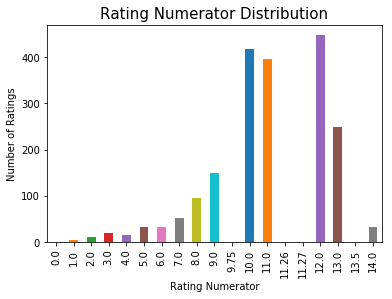

In [246]:
df['rating_numerator'].value_counts().sort_index().plot('bar')
plt.title ('Rating Numerator Distribution', size=15)
plt.xlabel('Rating Numerator')
plt.ylabel('Number of Ratings')
plt.plot();

Most of the dogs get rating_numerator in between 10-13

There is very few dogs even 1 or 2 with rating 0 and numerator rating as float


### What are the 10 most frequent dog names?


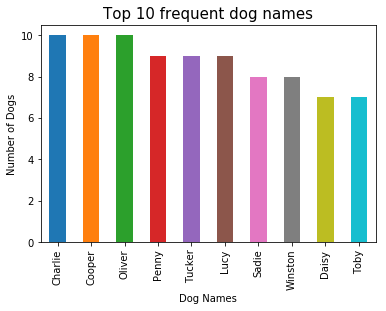

In [247]:
df['name'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Number of Dogs')
plt.title('Top 10 frequent dog names', size=15)
plt.xlabel('Dog Names')
plt.plot();

Most of the dogs are of names: Charlie, Cooper, liver, Penny, Tucker, Lucy, Sadie, Winston, Daisy, Toby

Also, check the count below:

In [248]:
#Top 10 frequent dog names
df['name'].value_counts()[0:10].sort_values(ascending=False)

Charlie    10
Cooper     10
Oliver     10
Penny       9
Tucker      9
Lucy        9
Sadie       8
Winston     8
Daisy       7
Toby        7
Name: name, dtype: int64


### What are the 10 most frequent predicted dog breeds?


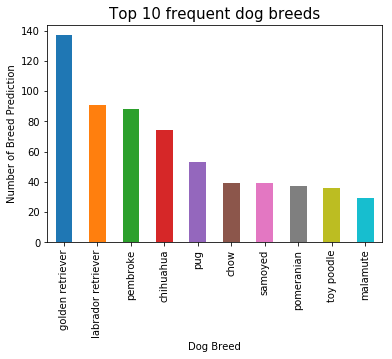

In [253]:
df['pred_breed'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Number of Breed Prediction')
plt.title('Top 10 frequent dog breeds', size=15)
plt.xlabel('Dog Breed')
plt.plot();

Most of the dogs have golden retriever, labrador retriever as breed which all are rated

Please check the top 10 rated dog breeds below:

In [254]:
#Top 10 frequent dog breeds
df['pred_breed'].value_counts()[0:10].sort_values(ascending=False)

golden retriever      137
labrador retriever     91
pembroke               88
chihuahua              74
pug                    53
chow                   39
samoyed                39
pomeranian             37
toy poodle             36
malamute               29
Name: pred_breed, dtype: int64

## Findings of the analysis

1. The pred_breed column is created based on the the confidence level of minimum 20% and 'p1_dog', 'p2_dog' and 'p3_dog' statements
2. Based on dog types: doggo, floofer, pupper, puppo, 'doggo, puppo', 'doggo, pupper', 'doggo, floofer', only one categorical column is created named as 'stage'
3. tweet_id is set as object type as it is not going to use for calculation.
4. A Master dataframe is created using archive_clean, image_pred_clean, and tweet_counts_clean dataframes
5. Dog Names Issue got rectified
7. Inconsistency in pred_breed got removed
8. All retweets get deleted to get unique tweets
9. The columns such as in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp is removed which is not needed
10. Timestamp format got corrected to datetime format
11. Extra HTML tags from source column get refracted
12. Dog ratings get standardized for denom of 10.

In [261]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

0